# Project description
Urban mobility significantly contributes to global environmental impact. With the growth in urbanareas worldwide, cities are implementing policies to focus on sustainable urban and mobility devel-opment. Urban areas exhibit high variability in structure, economic output, mobility behaviour,among others. Pinpointing to the exact causes of emissions is impossible. However, understandingthe relationship of mobility with infrastructure resources and other urban indicators may help gov-ernments predict long-term mobility behaviour and intervene with future pathways into sustainablemobility options. </br>

Project goals: You are tasked to identify how mobility is related to the infrastructural form of acity and across multiple cities. Use your findings toward helping governments transform mobilitywithin cities for reducing environmental impacts of mobility use.
Data: </br>
1. Local city-wide indicators of urban mobility: Multi-city Traffic Datasetprovided publicly byThe Institute for Transport Planning and Systems at ETH Zurich.
2. Global city-wide indicators of urban mobility and environmental impacts:Urban TypologiesProject[Reference]3.Get indicators for infrastructure resources from OSMNX (street networks) and PYROSM(amenities and points of interest) python packages.High-level project goals1.Explore, Investigate, and Visualize various factors of the mobility data across cities of interest.2.Describe and incorporate additional data sources that you will use to help you understandrelationships between mobility and the built environment.
3. Identify correlations between mobility and the built environment.4.Perform clustering or LISA analysis on city streets where congestion may be related stronglywith the presence of certain amenities. Think about how that may vary with distance toamenities.
4. Or, train and evaluate models using the mobility data (either as predictors or as the primaryresponse in some fashion) and your data sources.
6. Use and interpret your models to discuss the causes and correlations of or effects due todifferences in congestion across cities or within a city of your choice.
7. Aggregate city-wide findings to correlate with environmental indicators used in data set (2) -urban typology - to comment on policy initiatives of the governments. (Think how you mayaggregate city-wide findings to a single score for the whole city to compare with indicatorsused in data set 

(2))Note: Not all data may be available for all cities. Hence, conduct this analysis for at least5citiesoverlapping between sets1and2in the data. You are welcome to do the analysis in many morecities.


In [1]:
# import 
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pyrosm as py
import seaborn as sns
import pickle

### Load graphs

In [20]:
UTD19 = pd.read_csv('Data/detectors_public.csv') # read big file with all cities 
newcitylist= [ 'munich', 'rotterdam', 'frankfurt', 'hamburg', 'zurich'] # find only our cities for now, store in dataframe
UTD19Cities = UTD19.loc[UTD19.citycode.isin(newcitylist)] # UTD19Cities is dataframe

In [22]:
def GetGraphs(df):
    # function designed to extract bbox and create graphs with bbox
    clist = df.citycode.unique()
    GraphList = []
    for i in clist:
        maxlonglt = df.loc[df.citycode == i, ['long', 'lat']].max() # maxlonglat[0] = long, 1 lat
        minlonglt = df.loc[df.citycode == i, ['long', 'lat']].min() #
        north = maxlonglt[1] 
        south = minlonglt[1]
        east = maxlonglt[0]
        west = minlonglt[0]
        A = ox.graph.graph_from_bbox(north, south, east, west, network_type='drive')
        GraphList.append(A)
    return GraphList
        
Graphs = GetGraphs(UTD19Cities)

### Load POIS

In [3]:
# de filepaths zin nu specifiek voor mijn computer, moet je zelf even aanpassen naar waar die van jou staan
fp_rotterdam ="data/rotterdam.osm.pbf"
fp_munich ="data/munich.osm.pbf"
fp_zurich ="data/zurich.osm.pbf"
fp_hamburg ="data/hamburg.osm.pbf"
fp_frankfurt ="data/frankfurt.osm.pbf"

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

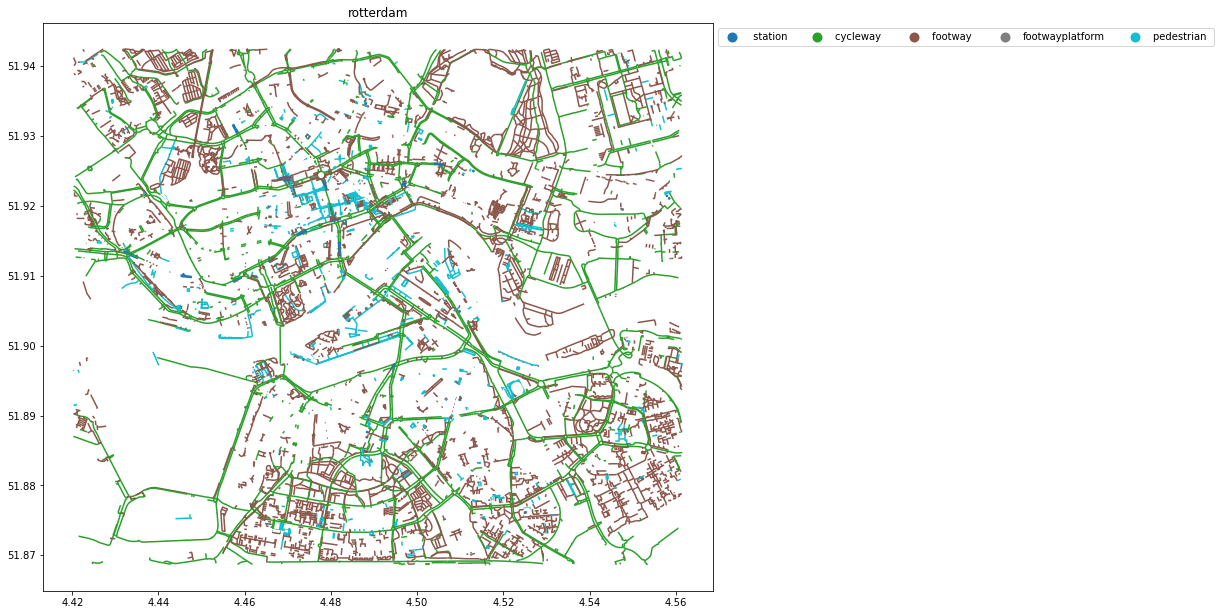

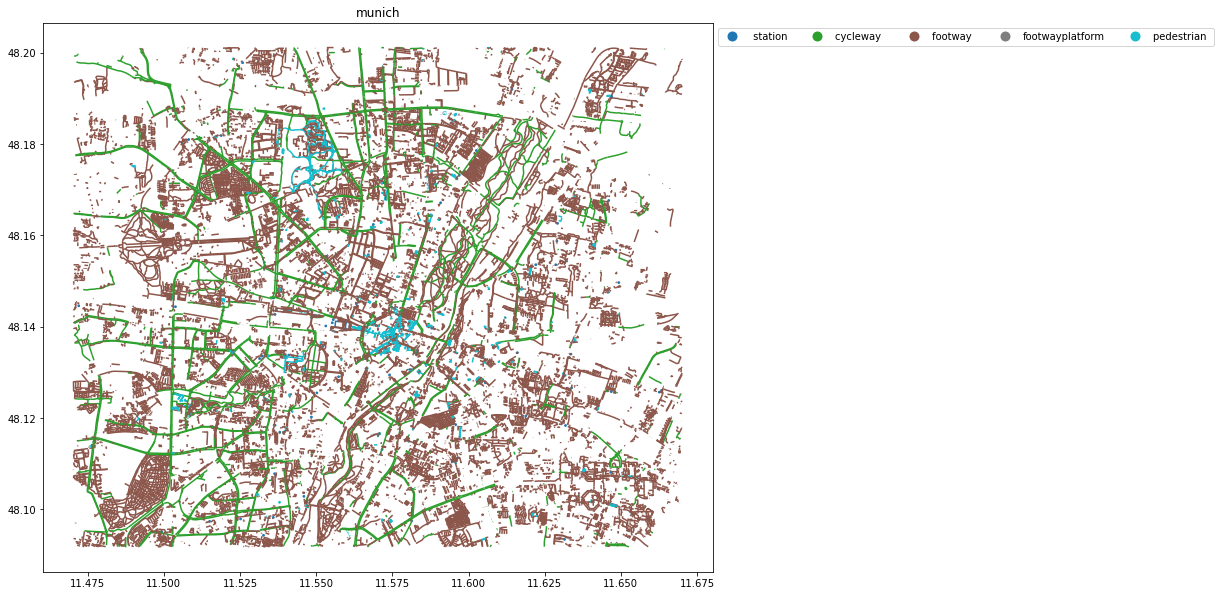

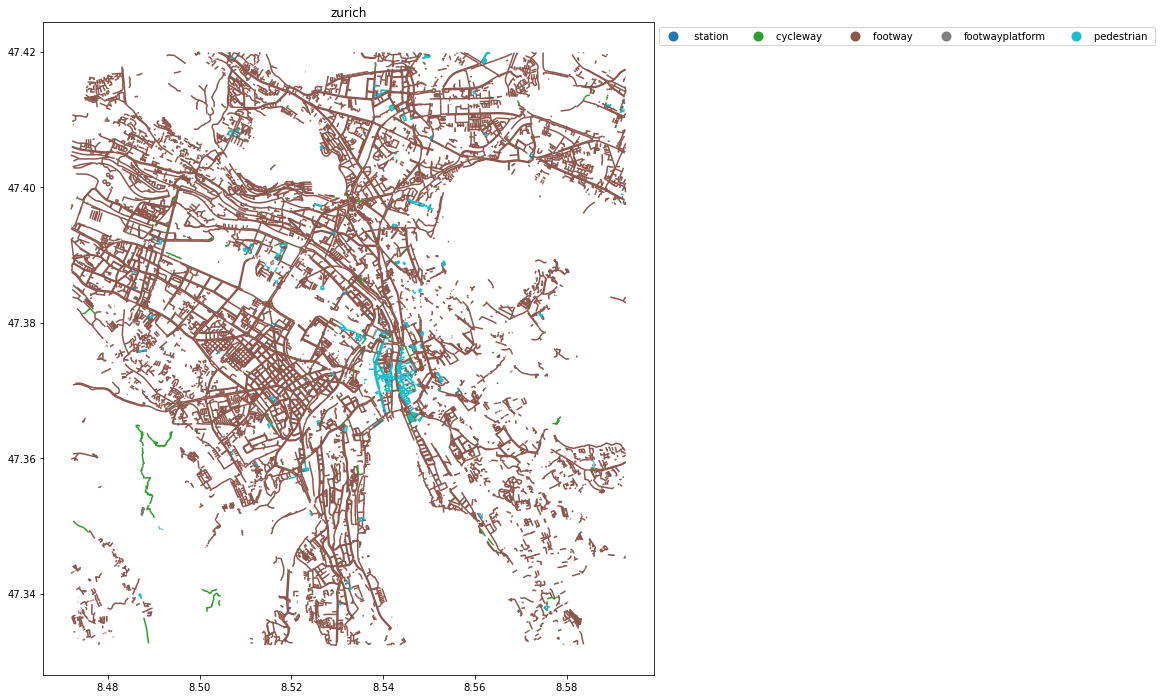

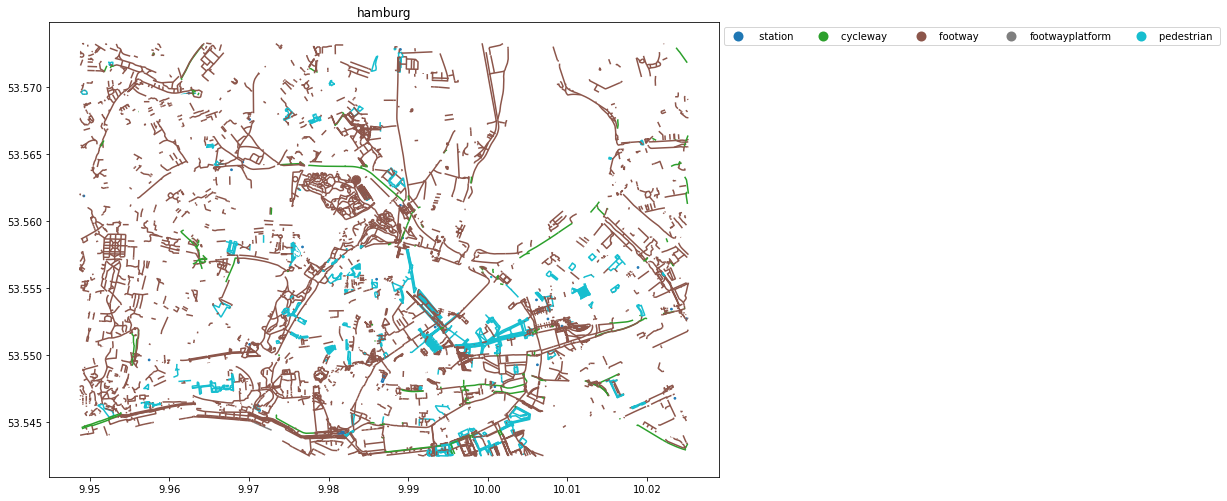

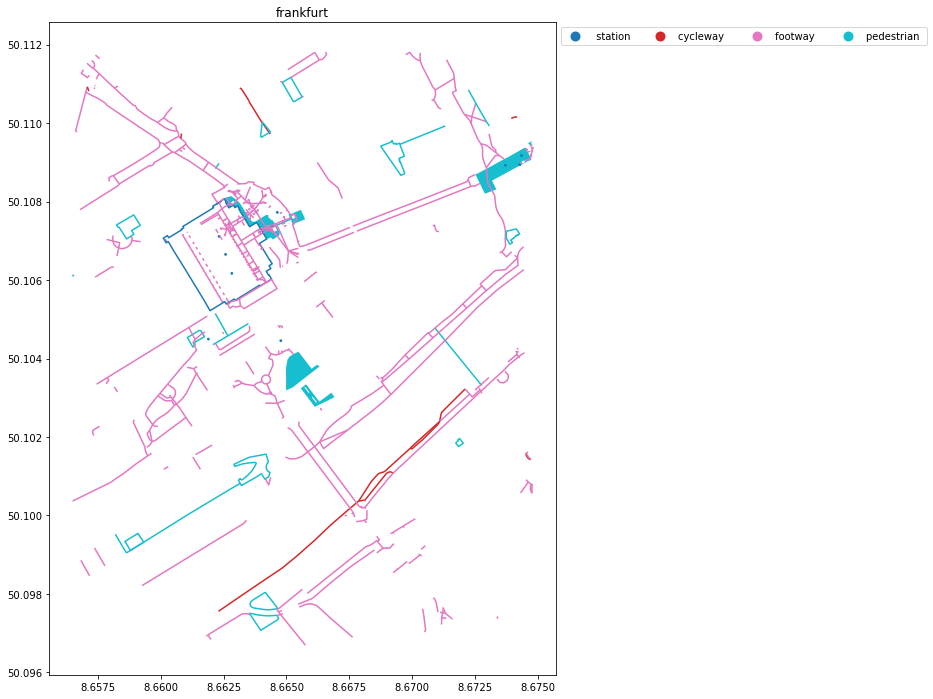

In [4]:
#alternative transport options
PoisDic = dict()
for i,v in [(fp_rotterdam, 'rotterdam'), (fp_munich, 'munich') , (fp_zurich, 'zurich'), (fp_hamburg, 'hamburg'), (fp_frankfurt, 'frankfurt')]:    # Initiliaze with bounding box
    osm = py.OSM(filepath=i)

    # By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
    # Here, let's read only "amenity" and "shop" by applying a custom filter that
    # overrides the default filtering mechanism
    custom_filter = {'public_transport': ['station'], 'highway': ['pedestrian', 'footway', 'cycleway', 'busway']}
    pois = osm.get_pois(custom_filter=custom_filter)

    # Gather info about POI type (combines the tag info from "amenity" and "shop")
    pois["public_transport"] = pois["public_transport"].fillna(" ")
    pois["highway"] = pois["highway"].fillna(" ")
    pois["poi_type"] = pois["highway"] + pois['public_transport']
    
    # save pois in dict
    PoisDic[v] = pois

    # Plot
    ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
    ax.set_title(v)
    pois.head()

In [5]:
PoisDic['rotterdam'].head() # stored in dataframe

tags       lon          id  \
0              {"bus":"yes","amenity":"bus_station"}  4.558490  1889797480   
1  {"bus":"yes","zone":"5175","source":"Arriva","...  4.488421  2032859196   
2  {"zone":"5300","subway":"yes","railway":"stati...  4.480911  3149917961   
3  {"zone":"5300","subway":"yes","network":"Rail ...  4.458148  3149917962   
4  {"zone":"5300","subway":"yes","network":"Rail ...  4.481973  3149917967   

   timestamp        lat  version  changeset addr:country               name  \
0          0  51.921089        0        0.0         None  Capelsebrug Metro   
1          0  51.887630        0        0.0         None          Zuidplein   
2          0  51.917953        0        0.0         None              Beurs   
3          0  51.930611        0        0.0           NL           Blijdorp   
4          0  51.914028        0        0.0         None         Leuvehaven   

                                  operator  ... service segregated sidewalk  \
0                                     None  ...     NaN        NaN      NaN   
1                                     None  ...     NaN        NaN      NaN   
2  Rotterdamse Elektrische Tram N.V. (RET)  ...     NaN        NaN      NaN   
3                                      RET  ...     NaN        NaN      NaN   
4                                      RET  ...     NaN        NaN      NaN   

  smoothness surface tracktype tunnel width website  poi_type  
0        NaN     NaN       NaN    NaN   NaN     NaN   station  
1        NaN     NaN       NaN    NaN   NaN     NaN   station  
2        NaN     NaN       NaN    NaN   NaN     NaN   station  
3        NaN     NaN       NaN    NaN   NaN     NaN   station  
4        NaN     NaN       NaN    NaN   NaN     NaN   station  

[5 rows x 40 columns]

# Save POI pickle

In [6]:
with open('POI.pickle', 'wb') as handle:
    pickle.dump(PoisDic, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
## Load POI pickle
# Load data (deserialize)
with open('POI.pickle', 'rb') as handle:
    poi_dic = pickle.load(handle)

### Load pickle

In [8]:
# Load data (deserialize)
with open('Edges.pickle', 'rb') as handle:
    dic = pickle.load(handle)

dic['rotterdam'].head()


osmid                     name      highway  \
0  [311806104, 311806106, 321898179]             's-Gravenweg  residential   
1                            7514536       Frans Bekkerstraat  residential   
2                            7515679       Frans Bekkerstraat  residential   
3                 [7515714, 7515628]            Verboomstraat  residential   
4                            7319072  Schultz van Hagenstraat  residential   

   oneway   length bridge                                           geometry  \
0   False   88.311    yes  LINESTRING (4.52452 51.92392, 4.52412 51.92331...   
1   False   61.119    NaN    LINESTRING (4.46527 51.89180, 4.46613 51.89165)   
2   False   76.835    NaN  LINESTRING (4.46527 51.89180, 4.46496 51.89218...   
3   False  145.552    NaN  LINESTRING (4.46527 51.89180, 4.46528 51.89177...   
4   False   48.438    NaN    LINESTRING (4.52872 51.92385, 4.52848 51.92344)   

  maxspeed lanes  ref junction tunnel access         u          v  key detid  
0      NaN   NaN  NaN      NaN    NaN    NaN  44417024  771255062    0   NaN  
1      NaN   NaN  NaN      NaN    NaN    NaN  44269570   44269098    0   NaN  
2       50   NaN  NaN      NaN    NaN    NaN  44269570  963879003    0   NaN  
3       50   NaN  NaN      NaN    NaN    NaN  44269570   44262667    0   NaN  
4      NaN   NaN  NaN      NaN    NaN    NaN  44417028   44412933    0   NaN

### Load flows

In [11]:
data_frankfurt = pd.read_csv('data\\UTD_f.csv')
data_hamburg = pd.read_csv('data/UTD_h.csv')
data_munich = pd.read_csv('data\\UTD_m.csv')
data_rotterdam = pd.read_csv('data\\UTD_r.csv')
data_zurich = pd.read_csv('data\\UTD_z.csv')

In [12]:
frankfurt_detid_average = (data_frankfurt.groupby('detid').flow.mean()).to_frame(name = None)
hamburg_detid_average = (data_hamburg.groupby('detid').flow.mean()).to_frame(name = None)
munich_detid_average = (data_munich.groupby('detid').flow.mean()).to_frame(name = None)
rotterdam_detid_average = (data_rotterdam.groupby('detid').flow.mean()).to_frame(name = None)
zurich_detid_average = (data_zurich.groupby('detid').flow.mean()).to_frame(name = None)

In [13]:
frankfurt_detid_average['city'] = 'frankfurt'
hamburg_detid_average['city'] = 'hamburg'
munich_detid_average['city'] = 'munich'
rotterdam_detid_average['city'] =  'rotterdam'
zurich_detid_average['city'] = 'zurich'

In [14]:
# most Functions dont use this
Mean_perdetid = pd.concat([frankfurt_detid_average,
                                  hamburg_detid_average,
                                  munich_detid_average,
                                  rotterdam_detid_average,
                                  zurich_detid_average])
          

In [15]:
result = Mean_perdetid.to_csv('data\\UTD_Mean_Flow_per_detid.csv', index = True)#exporting data frame as csv file.

### Load flows as edge atributes

In [16]:
# try plotting the flow on the OSMNX graph
hamburg_detid_average.reset_index(inplace = True)
frankfurt_detid_average.reset_index(inplace = True)
munich_detid_average.reset_index(inplace = True)
rotterdam_detid_average.reset_index(inplace = True)
zurich_detid_average.reset_index(inplace = True)

#df['ColumnID'] = df['ColumnID'].astype(str)
munich_detid_average.detid = munich_detid_average.detid.astype(str)

In [17]:
H = dic['hamburg']
def Match(detid, df):
    if type(detid) == str:
        flowval = df.loc[df.detid == detid, 'flow'].values # get specific value
        try:
            flowval = float(flowval) # convert array to float
            return flowval
        except:
            # list empty
            return np.nan
    
    
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])
#H['detid'].apply(Match, args = [hamburg_detid_average])
    

In [18]:
F = dic['frankfurt']
# H = dic['Hamburg'] # skip, allready done
M = dic['munich']
R = dic['rotterdam']
Z = dic['zurich']

F['flow'] = F['detid'].apply(Match, args = [frankfurt_detid_average])
M['flow'] = M['detid'].apply(Match, args = [munich_detid_average])
R['flow'] = R['detid'].apply(Match, args = [rotterdam_detid_average])
Z['flow'] = Z['detid'].apply(Match, args = [zurich_detid_average])
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])


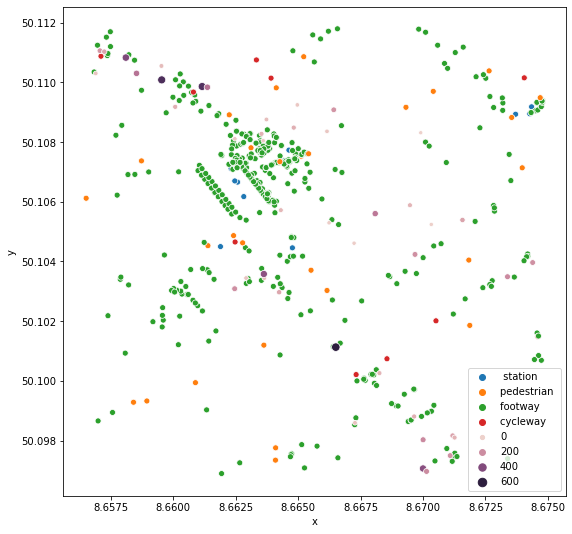

In [26]:
f, ax = plt.subplots(figsize=(9,9))
sns.scatterplot(x = 'x', y = 'y', ax = ax, data = pois, hue = pois['poi_type'].to_list())
F['x'] = F.geometry.centroid.x
F['y'] = F.geometry.centroid.y
flows = sns.scatterplot(x = 'x', y = 'y', ax =ax , data = F, hue = F['flow'].to_list(), size = F['flow'].to_list())
#plt.colorbar(flows)
#ax.legend()

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geomet

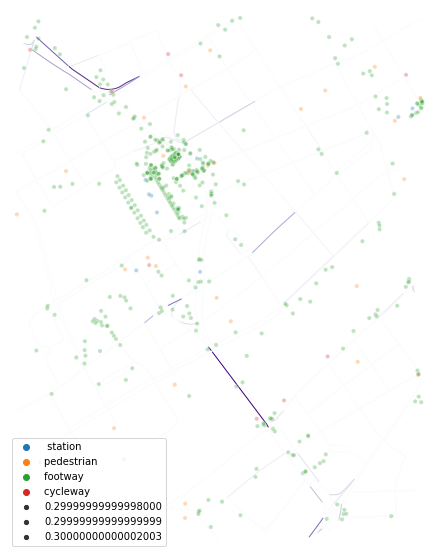

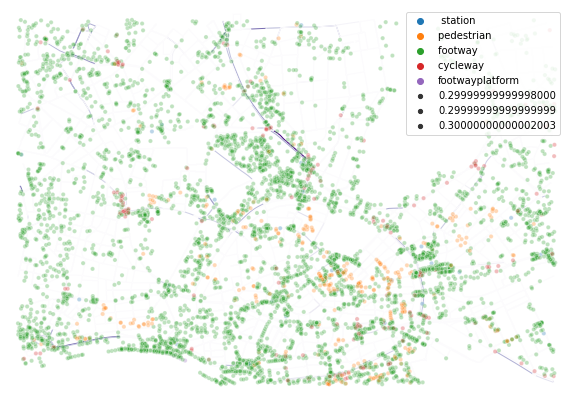

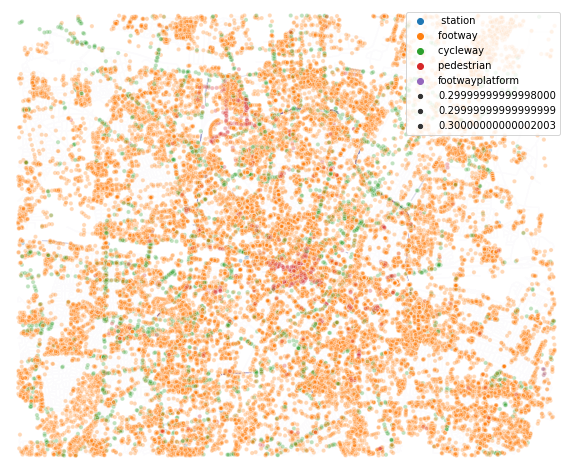

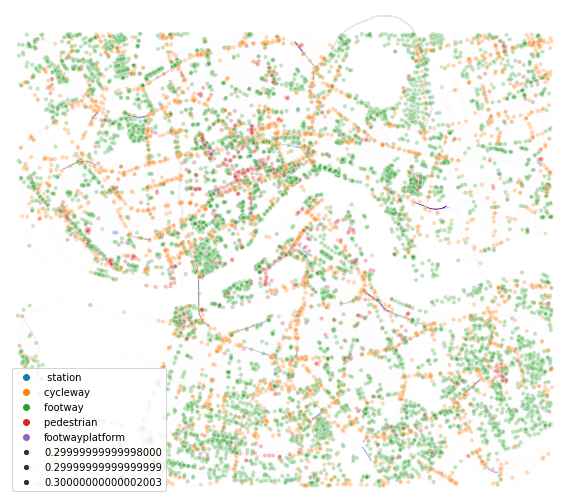

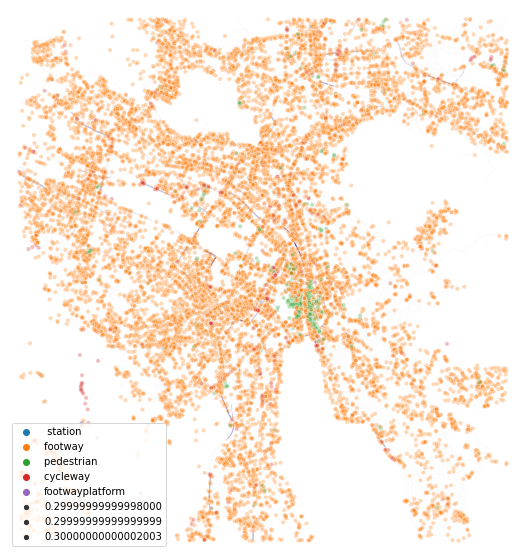

In [31]:
FlowDict = {'rotterdam':R ,'zurich': Z,'munich':M, 'frankfurt':F, 'hamburg':H}

def CreatePlots(GList, PDict, Clist = UTD19Cities.citycode.unique(), flowdict = FlowDict): 
    # need to run UTD19Cities, GetGraphs and need the POIS Dic
    for number,city in enumerate(Clist):
        GraphCity = GList[number]
        # plot build enviroment vs traffic flows 
        pois = PoisDic[city]
        pois['x'] = pois.geometry.centroid.x
        pois['y'] = pois.geometry.centroid.y
        
        N_d, remove = ox.graph_to_gdfs(GraphCity)
        Edge_df = FlowDict[city] # retrieve edge data
        Edge_df['flow'] = Edge_df.flow.fillna(0) # necessary for plotting colors
        New = ox.graph_from_gdfs(N_d, Edge_df, graph_attrs={'edge_attr': ['detid', 'flow']} )
        New.graph['crs'] = GraphCity.graph['crs']

        # setup plot
        f, ax = plt.subplots(figsize = (10,10))
        ec = ox.plot.get_edge_colors_by_attr(New, attr='flow', cmap='Purples') # set color scale by atribute (now length could be any other variable)
        z = ox.plot_graph(New, edge_color= ec, node_size=1, ax =ax, show = False, close = False) # edgecolor is stored in ec
        # uncomment line below if build enviroment also neccessary
        sns.scatterplot(x = 'x', y = 'y', ax = ax, data = pois , hue = pois['poi_type'].to_list(), alpha = 0.3, size = 0.3)
 
        
CreatePlots(Graphs, PoisDic)

# Spatial weights (rough)
Example FrankFurt

In [35]:
# retrieve Pois dic
pois = PoisDic['rotterdam']
pois.crs # crs is still in degrees -> reprojection necessary

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
pois = pois.to_crs('EPSG:4839')
pois.crs # worked, now in metres

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
pois.head()

tags       lon          id  \
0              {"bus":"yes","amenity":"bus_station"}  4.558490  1889797480   
1  {"bus":"yes","zone":"5175","source":"Arriva","...  4.488421  2032859196   
2  {"zone":"5300","subway":"yes","railway":"stati...  4.480911  3149917961   
3  {"zone":"5300","subway":"yes","network":"Rail ...  4.458148  3149917962   
4  {"zone":"5300","subway":"yes","network":"Rail ...  4.481973  3149917967   

   timestamp        lat  version  changeset addr:country               name  \
0          0  51.921089        0        0.0         None  Capelsebrug Metro   
1          0  51.887630        0        0.0         None          Zuidplein   
2          0  51.917953        0        0.0         None              Beurs   
3          0  51.930611        0        0.0           NL           Blijdorp   
4          0  51.914028        0        0.0         None         Leuvehaven   

                                  operator  ... sidewalk smoothness surface  \
0                                     None  ...      NaN        NaN     NaN   
1                                     None  ...      NaN        NaN     NaN   
2  Rotterdamse Elektrische Tram N.V. (RET)  ...      NaN        NaN     NaN   
3                                      RET  ...      NaN        NaN     NaN   
4                                      RET  ...      NaN        NaN     NaN   

  tracktype tunnel width website  poi_type         x          y  
0       NaN    NaN   NaN     NaN   station  4.558490  51.921089  
1       NaN    NaN   NaN     NaN   station  4.488421  51.887630  
2       NaN    NaN   NaN     NaN   station  4.480911  51.917953  
3       NaN    NaN   NaN     NaN   station  4.458148  51.930611  
4       NaN    NaN   NaN     NaN   station  4.481973  51.914028  

[5 rows x 42 columns]

In [38]:
from pysal.lib import weights
# get projections in meters
pois['X'] = pois.geometry.centroid.x
pois['Y'] = pois.geometry.centroid.y

# calculate using array, if binary = True -> 1 if neighbour, threshold in meters
w = weights.distance.DistanceBand.from_array(pois[['X','Y']], threshold = 250, binary = False) 
w[0] # example of w

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\scipy\sparse\data.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
 There are 8 islands with ids: 822, 4009, 4473, 4761, 5140, 7229, 10487, 10996.
  warnings.warn(message)


{11: 0.01839178608095525,
 131: 0.017220133263728798,
 132: 0.008296077472590906,
 133: 0.00998342011302522,
 134: 0.00412763330148496,
 2234: 0.00884542233055942,
 2698: 0.005266792547934974,
 2699: 0.007015757431208713,
 2700: 0.015024489587532976,
 3253: 0.004158132658087155,
 3619: 0.0043762184348743105,
 3654: 0.004913300436297736,
 3655: 0.004045065752296231,
 3659: 0.004712563811246328,
 3661: 0.009456407646686519,
 3663: 0.010371687424561054,
 3664: 0.004325040521268177,
 3665: 0.004278947110497261,
 3666: 0.005175651051532863,
 3667: 0.00424441209302808,
 3668: 0.004093388641434571,
 3781: 0.01060184388208958,
 5135: 0.0045854919710138125,
 5137: 0.004480704061482492,
 6927: 0.0044783792056809915,
 8394: 0.00628584017738901,
 8395: 0.005713309164201774}

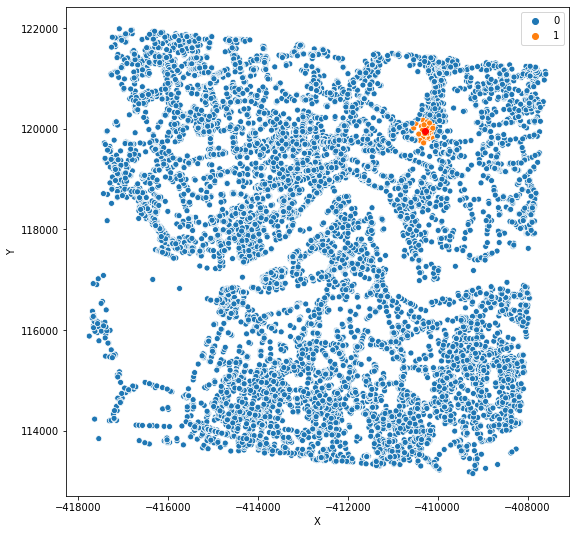

In [39]:
# Validation of W
# Setup figure
f, ax = plt.subplots(1, figsize=(9, 9))
# get neighbours
neis = w[300]
pois['neis'] = 0

for key in neis.keys():
    pois.loc[key,'neis'] = 1 # if neighbour is 1, otherwise 0 
# Plot base layer of polygons
sns.scatterplot(x= 'X', y = 'Y', ax=ax, data = pois, hue = pois['neis'].to_list())
# get first one -> plot in red
data = pois.iloc[300][['X','Y']]
ax.scatter(data.X, data.Y, color = 'red')

# DBSCAN

In [41]:
# retrieve Pois dic
pois = PoisDic['rotterdam']
pois.crs # crs is still in degrees -> reprojection necessary

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
# need to go te meters
pois = pois.to_crs('EPSG:4839')
pois.crs # worked, now in metres

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:xlabel='X', ylabel='Y'>

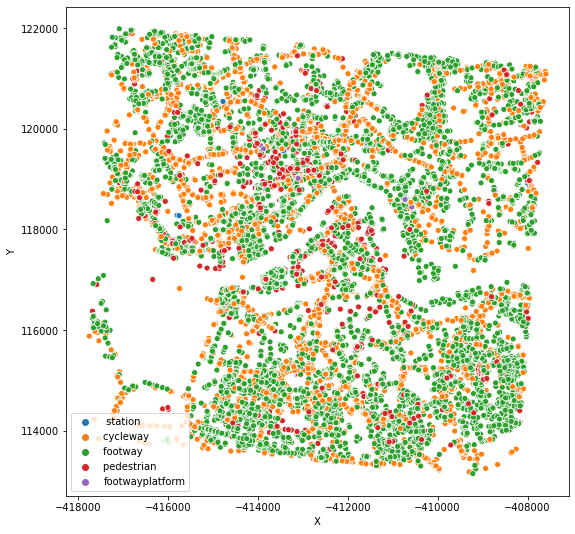

In [43]:
pois['X'] = pois.geometry.centroid.x # calculate x and y in metres
pois['Y'] = pois.geometry.centroid.y

# plot to show it worked
f, ax = plt.subplots(figsize = (9,9))
sns.scatterplot('X', 'Y', data = pois, ax=ax, hue = pois['poi_type'].to_list())

In [52]:
# run DB scan
from sklearn.cluster import DBSCAN
algo = DBSCAN(eps=300, min_samples=50) # eps = 100 m, samples 50

# fit
algo.fit(pois[["X", "Y"]])

DBSCAN(eps=300, min_samples=50)

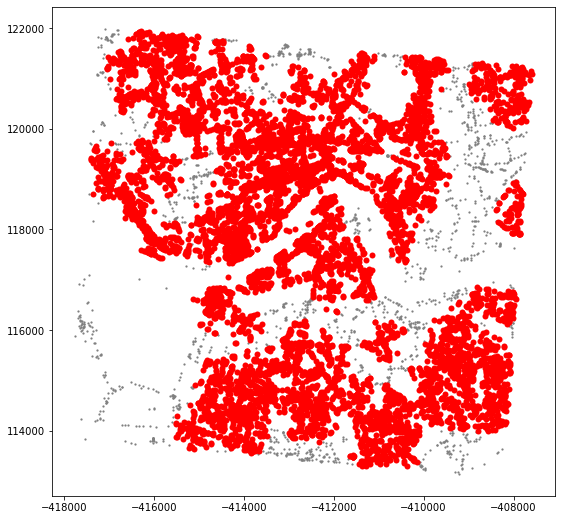

In [53]:
lbls = pd.Series(algo.labels_, index=pois.index)

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Assign labels to tokyo table dynamically and
# subset points that are not part of any cluster (noise)
noise = pois.assign(lbls=lbls)\
             .query("lbls == -1")
# Plot noise in grey
ax.scatter(noise["X"], 
           noise["Y"], 
           c='grey', 
           s=5, 
           linewidth=0
          )
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(pois.loc[pois.index.difference(noise.index), 
                     "X"
                    ], 
           pois.loc[pois.index.difference(noise.index), 
                     "Y"
                    ],
           c="red", 
           linewidth=0
          )
# Display the figure
plt.show()



In [57]:
pois['labels'] = lbls
# add labels to main dataframe
pois.head() # works

tags       lon          id  \
0              {"bus":"yes","amenity":"bus_station"}  4.558490  1889797480   
1  {"bus":"yes","zone":"5175","source":"Arriva","...  4.488421  2032859196   
2  {"zone":"5300","subway":"yes","railway":"stati...  4.480911  3149917961   
3  {"zone":"5300","subway":"yes","network":"Rail ...  4.458148  3149917962   
4  {"zone":"5300","subway":"yes","network":"Rail ...  4.481973  3149917967   

   timestamp        lat  version  changeset addr:country               name  \
0          0  51.921089        0        0.0         None  Capelsebrug Metro   
1          0  51.887630        0        0.0         None          Zuidplein   
2          0  51.917953        0        0.0         None              Beurs   
3          0  51.930611        0        0.0           NL           Blijdorp   
4          0  51.914028        0        0.0         None         Leuvehaven   

                                  operator  ... tracktype tunnel width  \
0                                     None  ...       NaN    NaN   NaN   
1                                     None  ...       NaN    NaN   NaN   
2  Rotterdamse Elektrische Tram N.V. (RET)  ...       NaN    NaN   NaN   
3                                      RET  ...       NaN    NaN   NaN   
4                                      RET  ...       NaN    NaN   NaN   

  website  poi_type         x          y              X              Y labels  
0     NaN   station  4.558490  51.921089 -407969.115106  118874.497908      3  
1     NaN   station  4.488421  51.887630 -413073.438120  115558.422116      0  
2     NaN   station  4.480911  51.917953 -413312.694698  118960.316297      1  
3     NaN   station  4.458148  51.930611 -414756.743713  120490.850901      1  
4     NaN   station  4.481973  51.914028 -413275.614330  118519.433943      1  

[5 rows x 45 columns]

<AxesSubplot:xlabel='X', ylabel='Y'>

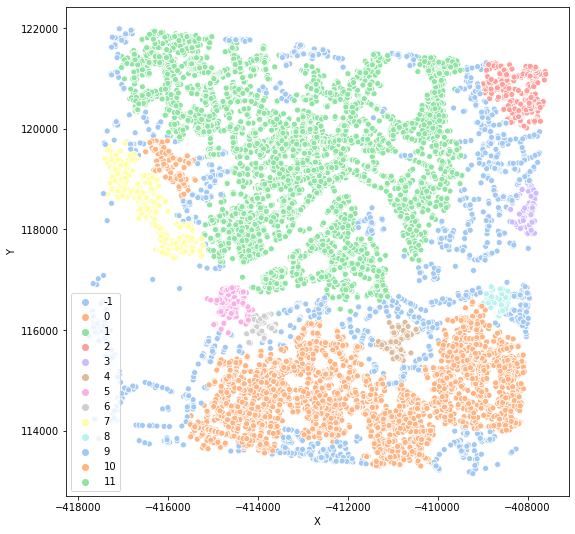

In [94]:
f, ax = plt.subplots(figsize = (9,9))
sns.scatterplot('X', 'Y', data = pois, ax=ax, hue = pois['labels'].to_list(), palette=('pastel'))

In [88]:
# try grouping by
TypeInCluster = pois.groupby('labels').poi_type.unique()

In [92]:
TypeInCluster # see roughly what is in each cluster

labels
-1     [ station, cycleway , footway , pedestrian , f...
 0          [ station, cycleway , footway , pedestrian ]
 1     [ station, cycleway , footway , pedestrian , f...
 2          [ station, cycleway , footway , pedestrian ]
 3                       [ station, cycleway , footway ]
 4                    [cycleway , footway , pedestrian ]
 5                    [footway , cycleway , pedestrian ]
 6                    [cycleway , footway , pedestrian ]
 7          [cycleway , footway , pedestrian ,  station]
 8                    [cycleway , footway , pedestrian ]
 9                    [cycleway , footway , pedestrian ]
 10                   [cycleway , footway , pedestrian ]
 11                   [footway , cycleway , pedestrian ]
Name: poi_type, dtype: object

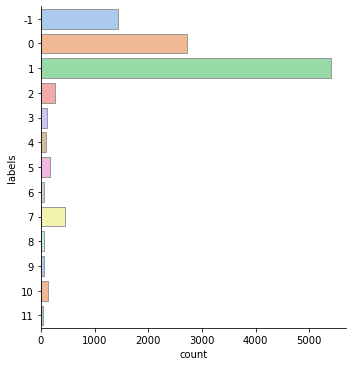

In [93]:
# try a plot?
# few areas with smaller clusters
sns.catplot(y="labels", kind="count",
            palette="pastel", edgecolor=".6",
            data=pois)

In [119]:
# how to link flows with clusters?
# what are the properties of each cluster? -> being close to each other/

# idea; get detector data
RotterdamDet = gpd.GeoDataFrame(UTD19Cities.loc[UTD19Cities.citycode == 'rotterdam'])

# call match -> link flow to det id and long lat        
RotterdamDet['flow'] = RotterdamDet.detid.apply(Match, args = [rotterdam_detid_average])
RotterdamDet.head() # works :)


detid    length       pos     fclass  \
16321  GRT02_MORO_1811_2_1  0.373911  0.307366  secondary   
16322  GRT02_MORO_1822_2_1  1.041926  0.533046  secondary   
16323  GRT02_MORO_1293_2_1  0.168822  0.074032  secondary   
16324  GRT02_MORO_1293_2_2  0.168822  0.074032  secondary   
16325  GRT02_MORO_1851_2_1  0.589675  0.148455      trunk   

                          road limit   citycode  lanes  linkid      long  \
16321          Kreekhuizenlaan    50  rotterdam    1.0   100.0  4.539146   
16322  Groeninx van Zoelenlaan    80  rotterdam    1.0    90.0  4.561430   
16323                Schiekade    50  rotterdam    1.0    47.0  4.475207   
16324                Schiekade    50  rotterdam    1.0    47.0  4.475207   
16325                  Vaanweg    50  rotterdam    1.0    96.0  4.512462   

             lat        flow  
16321  51.884051  392.931968  
16322  51.884623  339.342356  
16323  51.927265  385.277249  
16324  51.927265  280.088515  
16325  51.874034  342.891002

In [125]:
#df2_gdf = geopandas.GeoDataFrame(
#    df2, geometry=geopandas.points_from_xy(df2.long, df2.lat))
RotterdamDet['geometry'] = gpd.points_from_xy(RotterdamDet.long, RotterdamDet.lat)

In [126]:
RotterdamDet.crs = 'EPSG:4326'
RotterdamDet = RotterdamDet.to_crs('EPSG:4839')
RotterdamDet


detid    length       pos       fclass  \
16321  GRT02_MORO_1811_2_1  0.373911  0.307366    secondary   
16322  GRT02_MORO_1822_2_1  1.041926  0.533046    secondary   
16323  GRT02_MORO_1293_2_1  0.168822  0.074032    secondary   
16324  GRT02_MORO_1293_2_2  0.168822  0.074032    secondary   
16325  GRT02_MORO_1851_2_1  0.589675  0.148455        trunk   
...                    ...       ...       ...          ...   
16575  GRT02_MORO_1774_2_1  0.416623  0.157682    secondary   
16576  GRT02_MORO_1367_2_1  0.919353  0.817885    secondary   
16577  GRT02_MORO_1367_2_2  0.919353  0.817885    secondary   
16578  GRT02_MORO_1411_2_1  0.908734  0.557506    secondary   
16579  GRT02_MORO_1256_2_1  0.233637  0.042578  residential   

                          road limit   citycode  lanes  linkid      long  \
16321          Kreekhuizenlaan    50  rotterdam    1.0   100.0  4.539146   
16322  Groeninx van Zoelenlaan    80  rotterdam    1.0    90.0  4.561430   
16323                Schiekade    50  rotterdam    1.0    47.0  4.475207   
16324                Schiekade    50  rotterdam    1.0    47.0  4.475207   
16325                  Vaanweg    50  rotterdam    1.0    96.0  4.512462   
...                        ...   ...        ...    ...     ...       ...   
16575       Adriaan Volkerlaan    50  rotterdam    1.0    87.0  4.545496   
16576        Prins Hendrikkade    50  rotterdam    1.0    61.0  4.498277   
16577        Prins Hendrikkade    50  rotterdam    1.0    61.0  4.498277   
16578               Boezemlaan    50  rotterdam    1.0    51.0  4.493918   
16579           Breitnerstraat    30  rotterdam    1.0    20.0  4.467068   

             lat        flow                        geometry  
16321  51.884051  392.931968  POINT (-409627.897 114878.047)  
16322  51.884623  339.342356  POINT (-408094.756 114817.516)  
16323  51.927265  385.277249  POINT (-413618.789 120024.077)  
16324  51.927265  280.088515  POINT (-413618.789 120024.077)  
16325  51.874034  342.891002  POINT (-411548.145 113917.160)  
...          ...         ...                             ...  
16575  51.893602  446.291149  POINT (-409106.593 115900.975)  
16576  51.914055  137.207754  POINT (-412158.230 118430.894)  
16577  51.914055  358.095099  POINT (-412158.230 118430.894)  
16578  51.940705  535.588881  POINT (-412215.181 121408.128)  
16579  51.912887  216.775421  POINT (-414307.298 118476.877)  

[259 rows x 13 columns]

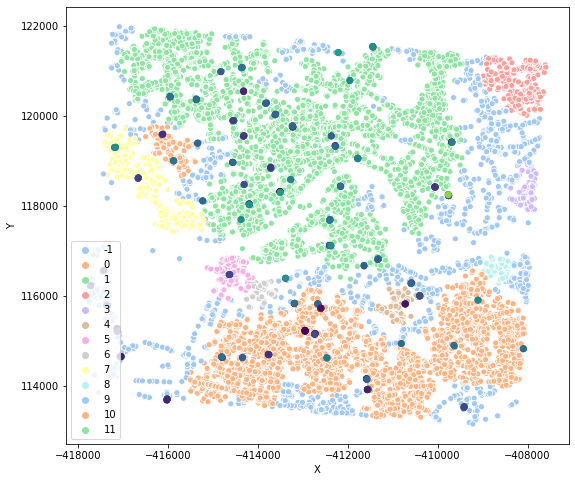

In [136]:
f, ax = plt.subplots(figsize = (9,9))
sns.scatterplot('X', 'Y', data = pois, ax=ax, hue = pois['labels'].to_list(), palette=('pastel'))
# for scatter make RotterdamDet to meter projection
z = RotterdamDet.plot('flow', cmap = 'viridis', ax=ax)
#plt.colorbar(z)